<a href="https://colab.research.google.com/github/TranGiaKhanh-23BI14218/Projects/blob/main/VehiclesClassificationCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!curl -L -o vehicle-detection-image-set.zip "https://prod-dcd-datasets-cache-zipfiles.s3.eu-west-1.amazonaws.com/dvnntk22h6-1.zip"
!unzip vehicle-detection-image-set.zip
!unzip positive.zip
!unzip negative.zip

!mkdir data
!mkdir data/negative
!mkdir data/positive

!mv negative/img/* data/negative
!mv positive/img/* data/positive

# DATASET_PATH = "data"

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35.4M  100 35.4M    0     0  42.7M      0 --:--:-- --:--:-- --:--:-- 42.7M
Archive:  vehicle-detection-image-set.zip
  inflating: positive.zip            
  inflating: negative.zip            
Archive:  positive.zip
   creating: positive/
   creating: positive/img/
  inflating: positive/img/img1.jpg   
  inflating: positive/img/img10.jpg  
  inflating: positive/img/img100.jpg  
  inflating: positive/img/img1000.jpg  
  inflating: positive/img/img1001.jpg  
  inflating: positive/img/img1002.jpg  
  inflating: positive/img/img1003.jpg  
  inflating: positive/img/img1004.jpg  
  inflating: positive/img/img1005.jpg  
  inflating: positive/img/img1006.jpg  
  inflating: positive/img/img1007.jpg  
  inflating: positive/img/img1008.jpg  
  inflating: positive/img/img1009.jpg  
  inflating: positive/img/img101.jpg  
  inflating: posit

Loading positive: 100%|██████████| 1230/1230 [00:00<00:00, 7772.85it/s]


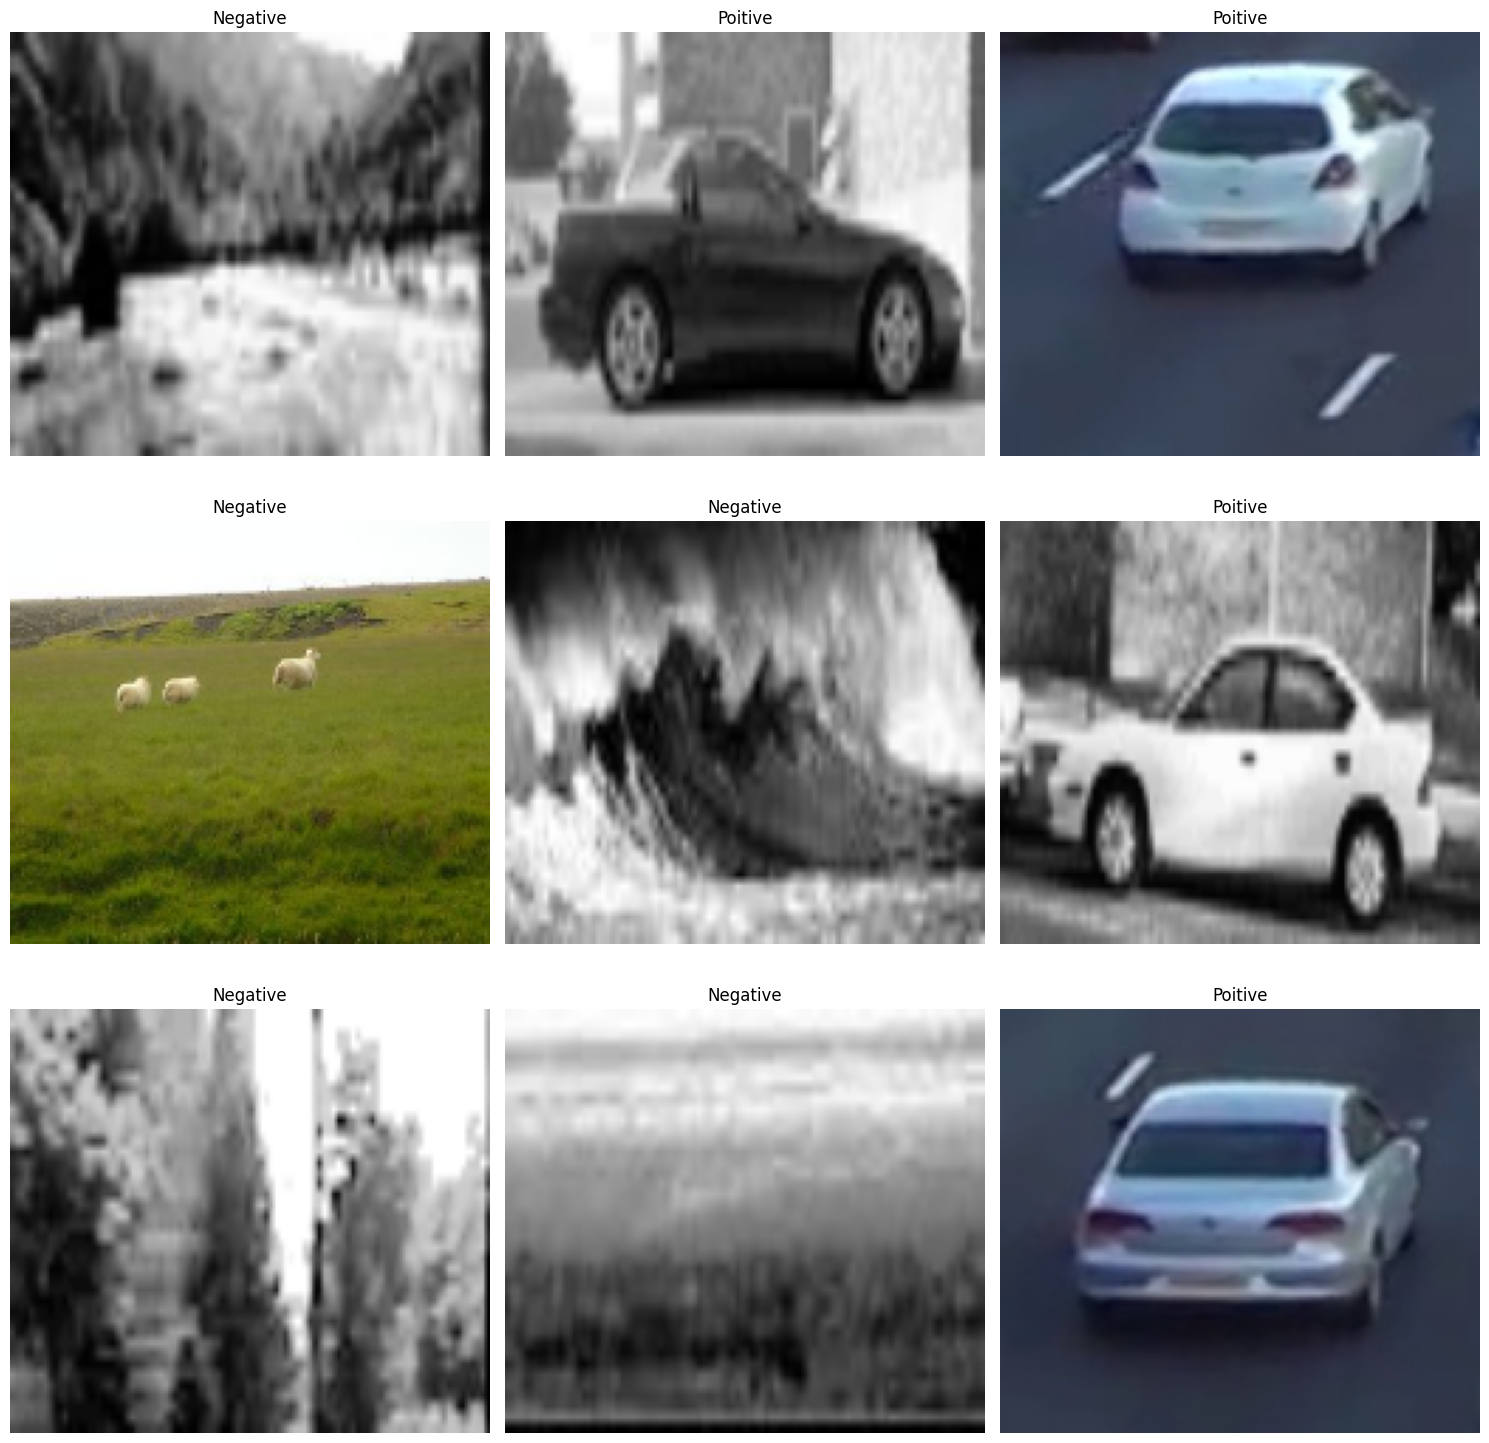

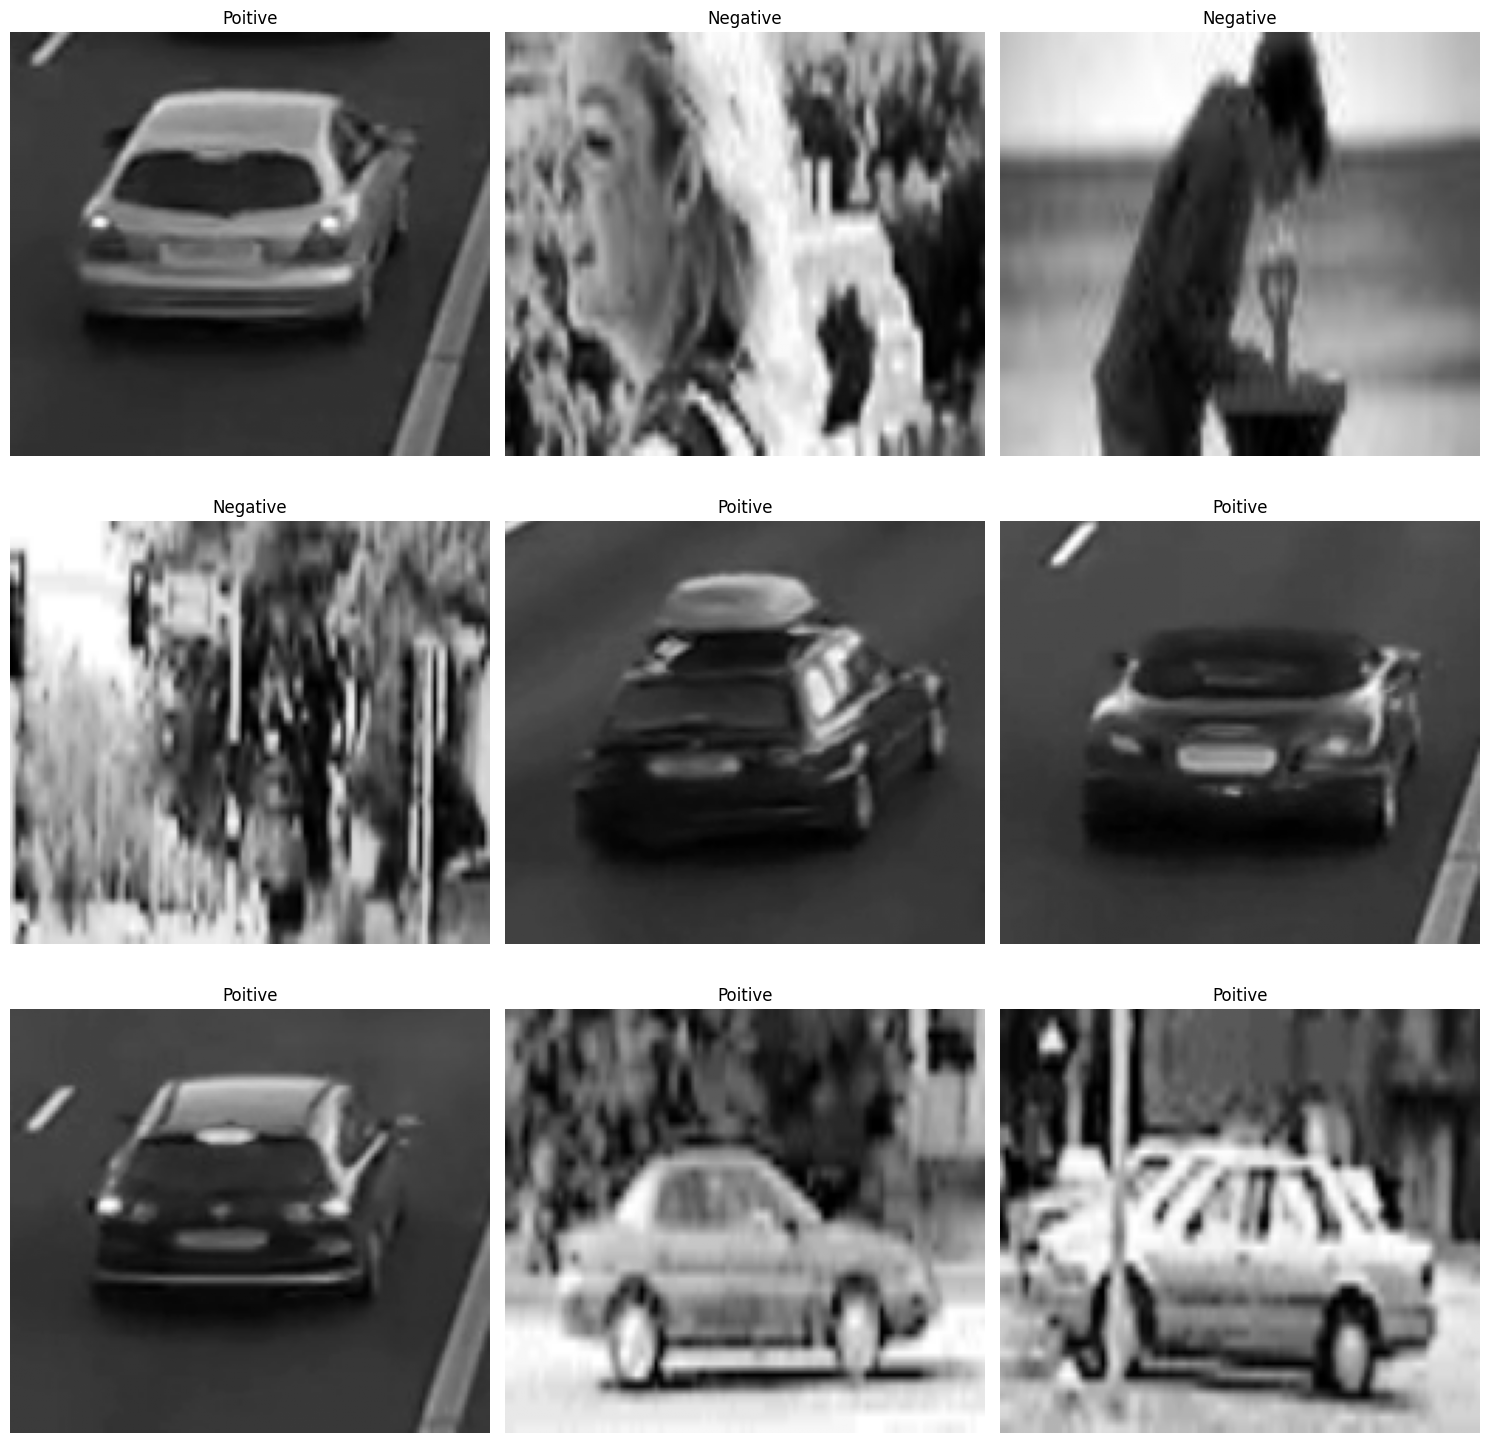

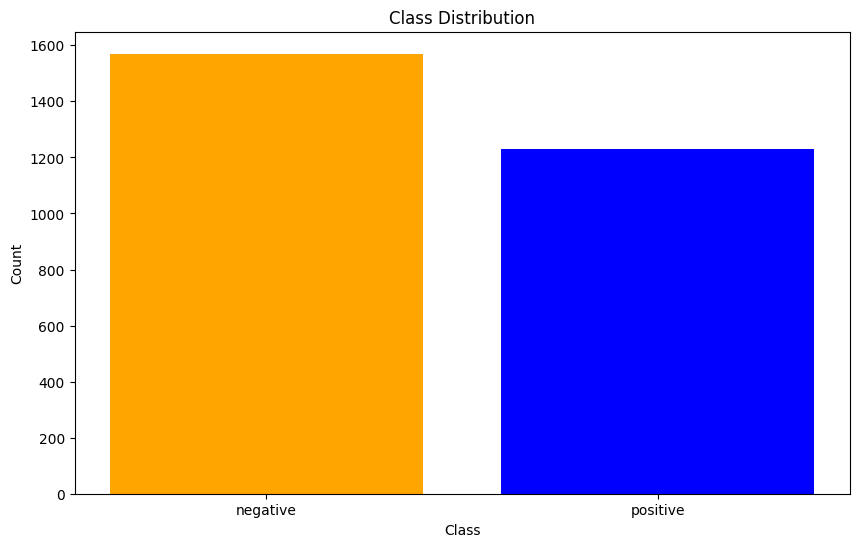

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 32ms/step - accuracy: 0.5774 - loss: 3.4412 - val_accuracy: 0.7982 - val_loss: 0.4746
Epoch 2/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7698 - loss: 0.4702 - val_accuracy: 0.8821 - val_loss: 0.2992
Epoch 3/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8377 - loss: 0.3791 - val_accuracy: 0.8946 - val_loss: 0.2288
Epoch 4/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8620 - loss: 0.3358 - val_accuracy: 0.8661 - val_loss: 0.3062
Epoch 5/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8912 - loss: 0.2462 - val_accuracy: 0.9107 - val_loss: 0.2308
Epoch 6/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.8995 - loss: 0.2546 - val_accuracy: 0.9464 - val_loss: 0.1397
Epoch 7/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9486 - loss: 0.1317 - val_accuracy: 0.9696 - val_loss: 0.1113
Epoch 8/10
70/70 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9345 - loss: 0.1627 - val_accuracy: 0.9304 - v

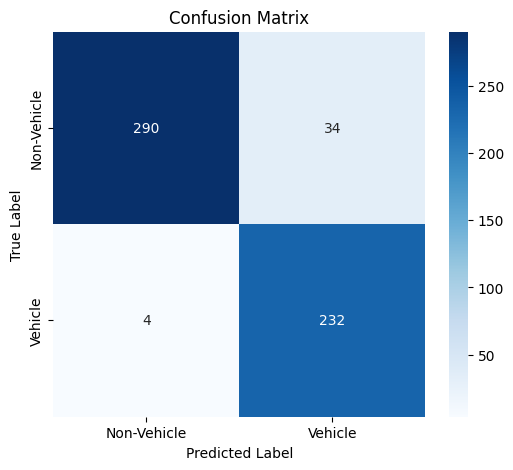

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.90      0.94       324
           1       0.87      0.98      0.92       236

    accuracy                           0.93       560
   macro avg       0.93      0.94      0.93       560
weighted avg       0.94      0.93      0.93       560



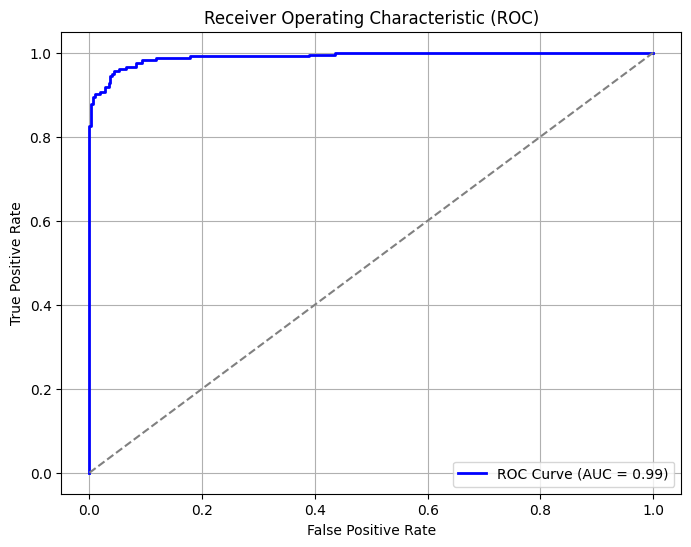

In [ ]:
import cv2
import os
import numpy as np
from tqdm import tqdm
import random
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report


# DATASET_PATH = "/kaggle/input/grwkjfhdjfnasjfbs/goodimage"
DATASET_PATH = "data"

labels_ = {"negative": 0, "positive": 1}
SIZE = (170, 150)

def load_data(path: str, size: tuple = (150, 150)) -> tuple:
    images = []
    labels = []

    for class_name in os.listdir(path):
        class_path = os.path.join(path, class_name)
        if os.path.isdir(class_path):
            for img_name in tqdm(os.listdir(class_path), desc=f"Loading {class_name}"):
                img_path = os.path.join(class_path, img_name)
                img = cv2.imread(img_path)
                if img is not None:
                    img = cv2.resize(img, size)  # Resize images
                    images.append(img)
                    labels.append(labels_[class_name])

    return np.array(images), np.array(labels)

def show_random_images(images: np.ndarray, labels: np.ndarray, num_samples: int, mode: str = 'BGR2RGB'):
    """Displays a grid of random images."""
    if num_samples > len(images):
        raise ValueError("Requested more samples than available.")

    random_indices = random.sample(range(len(images)), num_samples)
    class_names = {j: i for i, j in labels_.items()}

    selected_images = images[random_indices]
    selected_labels = [class_names[labels[index]].replace("s", "").capitalize() for index in random_indices]

    num_cols = 3
    num_rows = (num_samples + num_cols - 1) // num_cols

    plt.figure(figsize=(15, 5 * num_rows))
    for i, (img, label) in enumerate(zip(selected_images, selected_labels)):
        plt.subplot(num_rows, num_cols, i + 1)

        #  Automatically handle grayscale images
        if len(img.shape) == 2 or mode.upper() == 'GRAY':  # Already grayscale
            plt.imshow(img, cmap='gray')
        elif mode.upper() == 'BGR2RGB':
            img_display = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.imshow(img_display)
        else:
            plt.imshow(img)

        plt.title(label)
        plt.axis('off')

    plt.tight_layout()
    plt.show(block=True)


def plot_unique_values_and_counts(unique_values, counts):
    """Plots a bar chart for class distribution."""
    plt.figure(figsize=(10, 6))
    plt.bar(unique_values, counts, color=['orange', 'blue'])
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution')
    plt.xticks(unique_values)
    plt.show(block=True)

def to_gray(images: np.ndarray) -> np.ndarray:
    """Converts images to grayscale."""
    return np.array([cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) for img in images])

def build_model(input_shape):
    """Builds the CNN model."""
    model = Sequential([
        Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=input_shape),
        MaxPooling2D((5, 5)),
        Conv2D(64, (3, 3), activation='elu'),
        MaxPooling2D((3, 3)),
        Conv2D(32, (3, 3), activation='elu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    return model

if __name__ == "__main__":

    imgs, lbls = load_data(DATASET_PATH, SIZE)


    show_random_images(imgs, lbls, 9)


    imgs = to_gray(imgs)


    show_random_images(imgs, lbls, 9, mode="GRAY")


    unique_values, counts = np.unique(lbls, return_counts=True)
    labels_i = {j: i for i, j in labels_.items()}
    unique_values = [labels_i[item] for item in unique_values]
    plot_unique_values_and_counts(unique_values, counts)


    train_images, val_images, train_labels_, val_labels = train_test_split(imgs, lbls, test_size=0.2, random_state=42)


    train_images = train_images.reshape(-1, SIZE[0], SIZE[1], 1)
    val_images = val_images.reshape(-1, SIZE[0], SIZE[1], 1)


    model = build_model((SIZE[0], SIZE[1], 1))


    model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])


    model.fit(train_images, train_labels_, epochs=10, validation_data=(val_images, val_labels))


    predictions = model.predict(val_images)
    predicted_labels = (predictions > 0.5).astype("int").flatten()


    cm = confusion_matrix(val_labels, predicted_labels)


    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Vehicle", "Vehicle"], yticklabels=["Non-Vehicle", "Vehicle"])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title("Confusion Matrix")
    plt.show(block=True)


    print("Classification Report:\n", classification_report(val_labels, predicted_labels))

# ROC Curve and AUC Score

from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(val_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid()
plt.show(block=True)
